<a href="https://colab.research.google.com/github/rimosoma/neural/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING AND NEURAL NETWORKS, A.A. 2025/2026**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each sample, the first two columns represent the features while the last column represents the label.

Your task is to implement a k-NN classifier which calculates the probability that a given test example belongs to each class, and outputs a class label (i.e. the class with the highest probability). You will evaluate the classifier performance computing the average classification accuracy defined as the fraction of test examples that have been classified correctly with respect to the full test set.

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identify overfitting and underfitting in the obtained results.

Note that, for this experiment, you do not need to use a validation set.

**Other directives:**
*   You are required to implement the k-NN algorithm from scratch! Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import math
from IPython.display import clear_output
import time
#Implement a function to compute the Euclidean distance between two vectors, and one to implement the k-NN algorithm by:

def euclidean_distance(sample1, sample2):
  """Computes the Euclidean distance between two samples."""
  return np.sqrt(np.sum((sample1[:-1] - sample2[:-1])**2))

def knn_predict(entire_train_set, single_test_sample, k):
  """Predicts the class of a test sample using k-NN."""
  distances = np.array([euclidean_distance(single_test_sample, train_sample) for train_sample in entire_train_set])
  sorted_indices = np.argsort(distances)
  k_nearest_neighbors = entire_train_set[sorted_indices[:k]]
  classes = k_nearest_neighbors[:, -1]
  unique_classes, counts = np.unique(classes, return_counts=True)     #unique classes è un set con l'elenco delle classi dei vicini, count è un array che associa ad ogni sua posizione il numero di occorrenze
  return unique_classes[np.argmax(counts)]

#   - Taking a sample
#   - Computing all the distances between the sample element and the elements of the train set
#   - Sorting the train set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - Selecting the top k elements in terms of distance
#   - Evaluating to which class the majority of these k elements belongs to
#     (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)

Processing k = 200


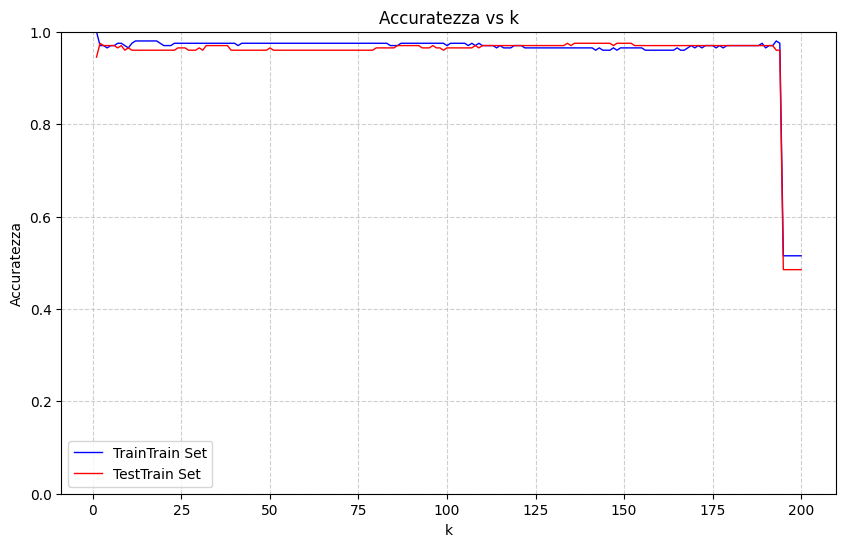

Tempo impiegato per l'elaborazione (K=1 a K=200): 129.47 secondi


In [ ]:
from re import T

#ESERCIZIO 1 SVOLTO IN CLASSE SENZA AIUTI/INFLUENZE

#Change the path to match the position of your file
#The Dataset can be loaded using the file option in Google Colab (the directory icon on the left)
start_time = time.time()


Dataset1 = h5py.File('/content/Lab1_Ex_01_Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]

elenco_accuratezze_traintrain = []
elenco_accuratezze_testtrain = []
valori_k = []

for k in range(1, 201):
  valori_k.append(k)
  lista_sample_risultato_Train = []
  lista_sample_risultato_Test = []
  clear_output(wait=True)
  print(f"Processing k = {k}")

  for sample in Train_Set:
    classe_votata = knn_predict(Train_Set, sample, k)
    lista_sample_risultato_Train.append((sample, int(classe_votata)))

  tot = 0
  for element in lista_sample_risultato_Train:
    if element[1] == element[0][2]:                   #per capire se la classe votata è uguale alla classe del sample contenuta nei dati
      tot += 1
  accuratezza_trainig_set = tot/len(Train_Set)
  elenco_accuratezze_traintrain.append(accuratezza_trainig_set)

  #--------------------------------------------------------------------------

  for sample in Test_Set:
    classe_votata = knn_predict(Train_Set, sample, k)
    lista_sample_risultato_Test.append((sample, int(classe_votata)))

  tot = 0
  for element in lista_sample_risultato_Test:
    if element[1] == element[0][2]:
      tot += 1
  accuratezza_test_set = tot/len(Test_Set)
  elenco_accuratezze_testtrain.append(accuratezza_test_set)



plt.figure(figsize=(10, 6))

# Linee sottili (linewidth=1) e label
plt.plot(valori_k, elenco_accuratezze_traintrain, 'b-', linewidth=1, label='TrainTrain Set')
plt.plot(valori_k, elenco_accuratezze_testtrain, 'r-', linewidth=1, label='TestTrain Set')

# Impostazioni in un blocco unico
plt.title("Accuratezza vs k")
plt.xlabel("k")
plt.ylabel("Accuratezza")
plt.ylim(0, 1)

# Aggiunge la griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Legenda e Mostra
plt.legend()
plt.show()

end_time = time.time()
tempo_totale = end_time - start_time
print(f"Tempo impiegato per l'elaborazione (K=1 a K=200): {tempo_totale:.2f} secondi")

#OUR FIRST IMPLEMENTATION


Processing k = 200


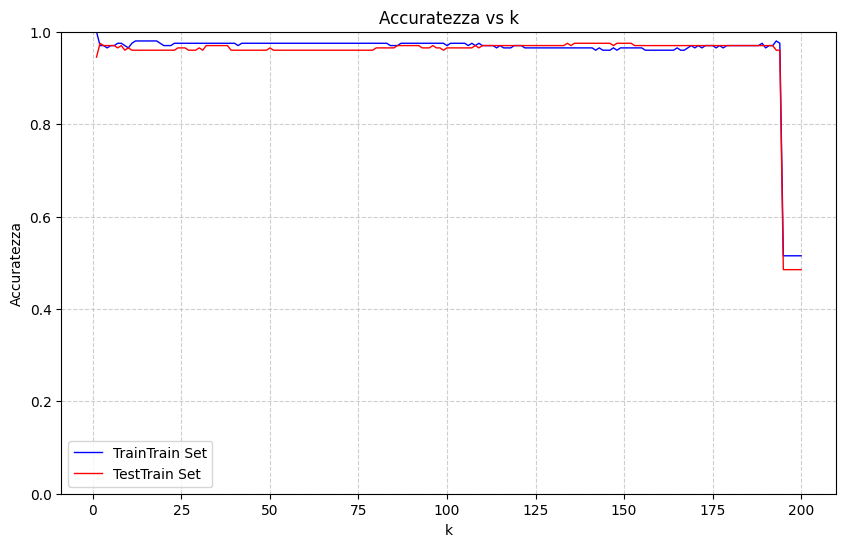

Tempo impiegato per l'elaborazione (K=1 a K=200): 39.33 secondi


In [ ]:
from re import T

#PROVA ES1 OTTIMIZZANDO USANDO FUNZIONI DELLA LIBRERIA AL POSTO DEL CONTEGGIO
#MANUALE "count 0, count 1"

#Change the path to match the position of your file
#The Dataset can be loaded using the file option in Google Colab (the directory icon on the left)
start_time = time.time()


Dataset1 = h5py.File('/content/Lab1_Ex_01_Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]

elenco_accuratezze_traintrain = []
elenco_accuratezze_testtrain = []

valori_k = []
for k in range(1, 201):
  valori_k.append(k)
  lista_sample_risultato_Train = []
  lista_sample_risultato_Test = []
  clear_output(wait=True)
  print(f"Processing k = {k}")

  for sample in Train_Set:
    #print(sample)
    sample_x = sample[0]
    sample_y = sample[1]
    sample_class = sample[2]
    elenco_dati_distanze_da_sample = []

    for el in Train_Set:
        el_x = el[0]
        el_y = el[1]
        el_class = el[2]
        distance = math.sqrt((sample_y-el_y)**2+(sample_x-el_x)**2)
        elenco_dati_distanze_da_sample.append((el, float(distance))) #aggiungo al set il punto e la distanza da cui dista la nostra incognita di analisi
    elenco_dati_distanze_da_sample_ordinato = sorted(elenco_dati_distanze_da_sample, key=lambda x: x[1])
    best_score = elenco_dati_distanze_da_sample_ordinato[:k]

    # Estrai le classi dei K vicini (terzo elemento del primo elemento della tupla)
    classi_vicini = np.array([el[0][2] for el in best_score], dtype=int)

    # Calcola il conteggio e trova la classe con la maggioranza
    # np.bincount([1, 1, 0, 1]) -> [1, 3] (1 zero, 3 uni)
    # np.argmax([1, 3]) -> 1 (l'indice con il valore più grande è la classe)
    conteggi = np.bincount(classi_vicini)
    classe_votata = np.argmax(conteggi)
    lista_sample_risultato_Train.append((sample, int(classe_votata)))


  tot = 0
  for element in lista_sample_risultato_Train:
    if element[1] == element[0][2]:
      tot += 1
  accuratezza_trainig_set = tot/len(Train_Set)
  elenco_accuratezze_traintrain.append(accuratezza_trainig_set)

  #--------------------------------------------------------------------------

  for sample in Test_Set:
    sample_x = sample[0]
    sample_y = sample[1]
    sample_class = sample[2]
    elenco_dati_distanze_da_sample = []

    for el in Train_Set:
        el_x = el[0]
        el_y = el[1]
        el_class = el[2]
        distance = math.sqrt((sample_y-el_y)**2+(sample_x-el_x)**2)
        elenco_dati_distanze_da_sample.append((el, float(distance))) #aggiungo al set il punto e la distanza da cui dista la nostra incognita di analisi
    elenco_dati_distanze_da_sample_ordinato = sorted(elenco_dati_distanze_da_sample, key=lambda x: x[1])
    best_score = elenco_dati_distanze_da_sample_ordinato[:k]

    # Estrai le classi dei K vicini (terzo elemento del primo elemento della tupla)
    classi_vicini = np.array([tupla[0][2] for tupla in best_score], dtype=int)

    # Calcola il conteggio e trova la classe con la maggioranza
    # np.bincount([1, 1, 0, 1]) -> [1, 3] (1 zero, 3 uni)
    # np.argmax([1, 3]) -> 1 (l'indice con il valore più grande è la classe)
    conteggi = np.bincount(classi_vicini)
    classe_votata = np.argmax(conteggi)
    lista_sample_risultato_Test.append((sample, int(classe_votata)))

  tot = 0
  for element in lista_sample_risultato_Test:
    if element[1] == element[0][2]:
      tot += 1
  accuratezza_test_set = tot/len(Test_Set)
  elenco_accuratezze_testtrain.append(accuratezza_test_set)


plt.figure(figsize=(10, 6))

# Linee sottili (linewidth=1) e label
plt.plot(valori_k, elenco_accuratezze_traintrain, 'b-', linewidth=1, label='TrainTrain Set')
plt.plot(valori_k, elenco_accuratezze_testtrain, 'r-', linewidth=1, label='TestTrain Set')

# Impostazioni in un blocco unico
plt.title("Accuratezza vs k")
plt.xlabel("k")
plt.ylabel("Accuratezza")
plt.ylim(0, 1)

# Aggiunge la griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Legenda e Mostra
plt.legend()
plt.show()

end_time = time.time()
tempo_totale = end_time - start_time
print(f"Tempo impiegato per l'elaborazione (K=1 a K=200): {tempo_totale:.2f} secondi")


This exercise implements a **k-Nearest Neighbors classifier**: algorithm to classify samples into one of different categories  (using the NumPy library). In this first case, the dataset contains only two classes(0,1).

We trained the model using 200 samples and tested it on another 200 samples. The goal was to evaluate how the classification accuracy changes for different values of k (the number of neighbors considered in the majority vote).

Firsty we have define two main functions that will be useful also in the next excercises:

* **Euclidean Distance:** The function calculates the distance between two samples, using ([:-1]) to exclude the class label (which is in the last column) and mantain the features (D components) on which it's calculated:


$$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{D} (sample_i - train_i)^2}$$

* **k-NN Prediction:** The function computes all distances, sorts the indices using np.argsort, selects the top $k$ neighbors, and determines the predicted class using the **Maximum A Posteriori (MAP) estimate** approach, by finding the most probable class
label (majority vote) (np.unique and np.argmax), which is the implementation of $\hat{y} = \arg \max_{c} p(y=c | x, \mathcal{D}, K)$.


Analysis of Results and Model Behavior

The generated graph shows the accuracy on the y axis with respect to the increment of k, showed on the x.

Overfitting ($k$ Small)

* **Observed Behavior:** The **Train Set Accuracy (blue line)** is close to 1.0 for very small values of $k$ (specifically, $k=1$). The **Test Set Accuracy (red line)** is noticeably lower than the training accuracy in this range. As explained in the lecture slides, setting $k=1$ causes the k-NN method to make **no error on the training set** because the closest neighbor to any training sample is the sample itself, and its label is always correct. The model **memorizes the training data** but **generalizes poorly** to unseen test data(outside the training set).

$k$ Intermediate

* **Observed Behavior:** In this region, the gap between the train and test accuracies is minimal, indicating the best trade-off. The increasing of $k$ provides more **averaging** and makes the decision boundary smoother, mitigating the noise captured by small $k$ values.

Underfitting ($k$ Large)

* **Observed Behavior:** As $k$ continues to increase toward the total number of training samples ($N=200$), the Test Set Accuracy starts to decline, and both the training and test accuracies drop significantly towards $k=200$.
 If $K$ is too large (approaching $N$), the classifier begins to **predict the majority label of the whole dataset** instead of predicting the class most diffuse around the sample.

**Conclusion:** The experiment successfully demonstrates how the hyperparameter $K$ controls the model. The optimal model for k-NN is found at the value of $k$ that minimizes the misclassification rate on the **test set** (generalization error).

**Optimization**:
Having observed that the implementation was too slow, we decided to try creating new code that avoided calling the function every time. We created code using the procedural programming paradigm. This process allowed us to reduce the execution time, which went from about 130 seconds to about 36 seconds. This is likely due to the time the computer takes to call these functions at each iteration.



**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real-life problem will be examined. The dataset used in this exercise was derived from the wine quality dataset used in "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.

For each element of the dataset 11 features are provided, representing different wine characteristics such as density, pH and alcholic content, while the final column consists of a quality evaluation on a scale from 1 to 10 (more information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality).

A subset of the dataset containing 400 elements is provided. The student should create a training set and a test set of 200 samples each, and the goal is to:
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identify overfitting and underfitting in the obtained results.

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear regression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression()

Processing k = 200


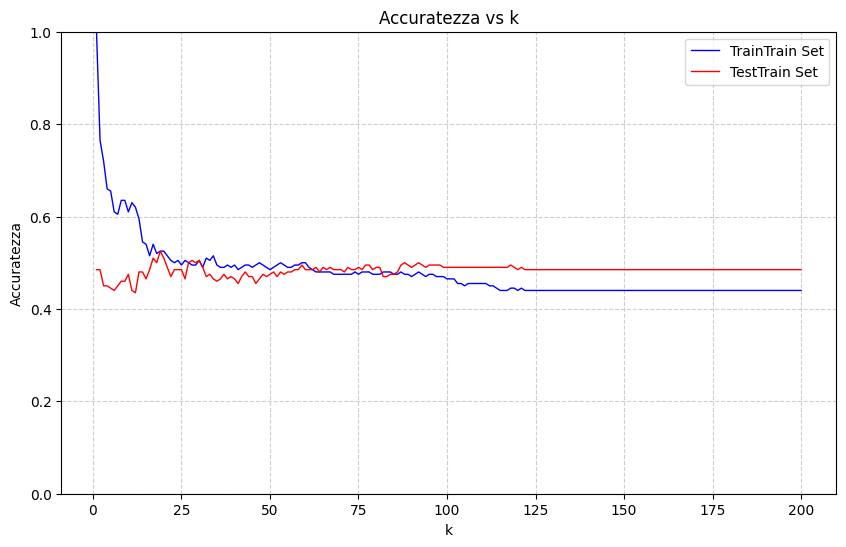

Tempo impiegato per l'elaborazione (K=1 a K=200): 147.85 secondi


In [ ]:
#Part 1
start_time = time.time()

Dataset2 = h5py.File('/content/Lab1_Ex_02_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]

#To be completed by the student

elenco_accuratezze_traintrain = []
elenco_accuratezze_testtrain = []

valori_k = []
for k in range(1, 201):
  valori_k.append(k)
  lista_sample_risultato_Test = []
  lista_sample_risultato_Train = []
  clear_output(wait=True)
  print(f"Processing k = {k}")

  for sample in Train_Set:
    classe_votata = knn_predict(Train_Set, sample, k)
    lista_sample_risultato_Train.append((sample, int(classe_votata)))

  tot = 0
  for element in lista_sample_risultato_Train:
    if element[1] == element[0][11]:                   #per capire se la classe votata è uguale alla classe del sample contenuta nei dati
      tot += 1
  accuratezza_trainig_set = tot/len(Train_Set)
  elenco_accuratezze_traintrain.append(accuratezza_trainig_set)

  #--------------------------------------------------------------------------

  for sample in Test_Set:

    classe_votata = knn_predict(Train_Set, sample, k)
    lista_sample_risultato_Test.append((sample, int(classe_votata)))

  tot = 0
  for tupla in lista_sample_risultato_Test:
    if tupla[1] == tupla[0][11]:
      tot += 1
  accuratezza_test_set = tot/len(Test_Set)
  elenco_accuratezze_testtrain.append(accuratezza_test_set)

plt.figure(figsize=(10, 6))

# Linee sottili (linewidth=1) e label
plt.plot(valori_k, elenco_accuratezze_traintrain, 'b-', linewidth=1, label='TrainTrain Set')
plt.plot(valori_k, elenco_accuratezze_testtrain, 'r-', linewidth=1, label='TestTrain Set')

# Impostazioni in un blocco unico
plt.title("Accuratezza vs k")
plt.xlabel("k")
plt.ylabel("Accuratezza")
plt.ylim(0, 1)

# Aggiunge la griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Legenda e Mostra
plt.legend()
plt.show()

end_time = time.time()
tempo_totale = end_time - start_time
print(f"Tempo impiegato per l'elaborazione (K=1 a K=200): {tempo_totale:.2f} secondi")

In [ ]:
#Part 2
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
clf = linear_model.LinearRegression()

Dataset2 = h5py.File('/content/Lab1_Ex_02_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]



X_train = Train_Set[:, :11] #matrice dati
Y_train = Train_Set[:, 11]  #vettore colonna osservazioni

X_test = Test_Set[:, :11]
Y_test = Test_Set[:, 11]


clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")

#cos'è accuratezza in questo contesto


    # 1. Calcola la differenza (errore) tra i valori reali e i predetti (vettoriale)
    #    Risultato: [Y1-Y_hat1, Y2-Y_hat2, ...]
    #errori = Y_test - Y_pred

    # 2. Eleva al quadrato tutti gli errori (vettoriale)
    #    Risultato: [(Y1-Y_hat1)^2, (Y2-Y_hat2)^2, ...]
    #errori_quadrati = errori**2

    # 3. Calcola la media degli errori al quadrato (riduzione scalare)
    #    np.mean(array) è equivalente a np.sum(array) / len(array)
    #mse = np.mean(errori_quadrati)








Mean Squared Error: 0.6067150439571319


This exercise applies the k-NN classifier to the Wine Quality dataset, aiming to predict wine quality (the label) based on 11 physicochemical features. The graph shows the evolution of the classification **accuracy** on the **Test Set** (`TestTrain Set`) as the hyperparameter $k$ (the number of neighbors) increases from 1 to 200.

***Part 1 - Analysis of the Graph and Model Behavior***

**Low Accuracy:** The overall accuracy is quite low, fluctuating around $0.45$ to $0.52$. This suggests the k-NN model, based on the Euclidean distance between raw features, struggles significantly with this dataset. A $50\%$ accuracy means the model is often no better than random guessing if there were two balanced classes. Given that the label is a quality score (likely ranging from 1 to 10), predicting the exact score is a much harder task than binary classification.

 **Overfitting ($k$ Small):**
    * For very small $k$ (e.g., $k=1$ to $k \approx 10$), the line shows some of the most significant **fluctuations** and peaks (e.g., around $k=15$ and $k=30$).
    * In a real-world dataset like this, a high accuracy at $k=1$ (which isn't shown, but we expect it to be near $1.0$ if the training set were plotted) combined with the low test accuracy ($\approx 0.45$) confirms that **overfitting is substantial** when the model's complexity is high (small $k$). The classifier is memorizing specific noisy details, which do not translate to unseen data.

**Stability and Underfitting ($k$ Large):**
    * As $k$ increases past approximately $k=50$, the accuracy line becomes much **smoother and extremely stable**, plateauing almost perfectly around 0.50.
    * The model achieves its most consistent (though still low) performance in this range.
    * This stability is a sign of **underfitting**. When $k$ is very large, the prediction is essentially based on the majority class (or average vote) of a large chunk of the training set. The model loses its ability to capture local patterns and simply reverts to predicting the most frequent output class. The fact that the stable accuracy is still very low confirms the model is too simple (or the distance metric is inadequate for this data) to be effective.

***Conclusion***

The k-NN classifier performs poorly on the Wine Quality dataset in this configuration. The lack of high accuracy, even in the optimal $k$ range, suggests two likely issues:

**The Curse of Dimensionality:** With 11 features, the space is high-dimensional, potentially making the Euclidean distance less meaningful, as discussed in the theory (Slide 24).
**Need for Data Preprocessing:** Real-world datasets often require **feature scaling** (standardization or normalization) to ensure all features contribute equally to the distance calculation, which may be a necessary step to improve k-NN performance on this data. The raw features likely have varying scales, leading to poor performance.



***Part 2***

Shifts the focus from classification (k-NN) to regression using Linear Regression on the Wine Quality dataset. The goal is to model the wine quality as a continuous numerical value based on 11 features. The calculated Mean Squared Error (MSE) is 0.6067, which represents the average squared difference between the predicted quality scores and the actual quality scores (y− $\hat{y}$) in the test set. Because this is a regression task predicting a continuous output, accuracy, which is defined as the fraction of correct predictions, is not a standard or meaningful metric. If accuracy were calculated here, it would likely be near zero, as it's almost impossible for the predicted continuous float to exactly match the true integer quality score on a 1-to-10 scale. Instead, the MSE is used to quantify the model's performance, where a lower value indicates better fit.

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. The student should create a training set and a test set of 200 samples each.

*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identify overfitting and underfitting in the obtained results.

Processing k = 200


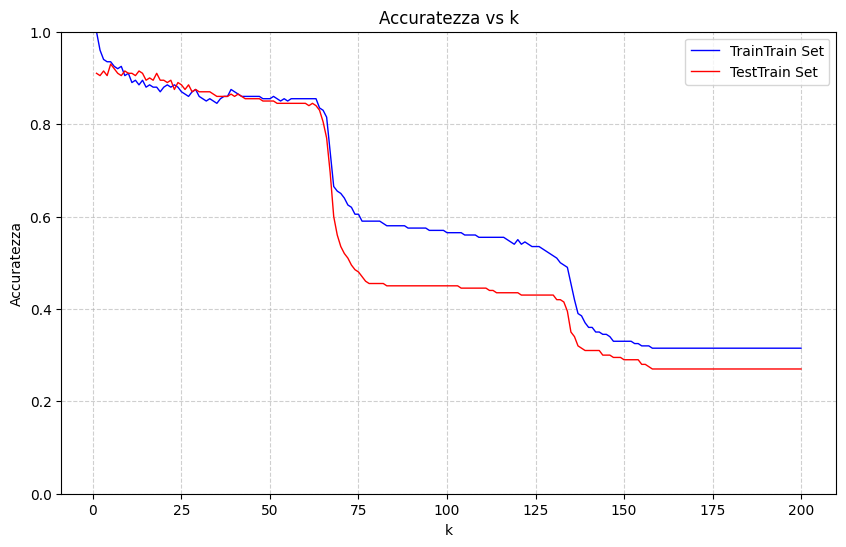

Tempo impiegato per l'elaborazione (K=1 a K=200): 177.82 secondi


In [ ]:
start_time = time.time()

Dataset3 = h5py.File('/content/Lab1_Ex_03.hdf5')

Data = np.array(Dataset3.get('Dataset'))

Train_Set = Data[:200,:]
Test_Set = Data[200:,:]


elenco_accuratezze_traintrain = []
elenco_accuratezze_testtrain = []

valori_k = []
for k in range(1, 201):
  valori_k.append(k)
  lista_sample_risultato_Test = []
  lista_sample_risultato_Train = []
  clear_output(wait=True)
  print(f"Processing k = {k}")

  for sample in Train_Set:
    classe_votata = knn_predict(Train_Set, sample, k)
    lista_sample_risultato_Train.append((sample, int(classe_votata)))

  tot = 0
  for element in lista_sample_risultato_Train:
    if element[1] == element[0][256]:                   #per capire se la classe votata è uguale alla classe del sample contenuta nei dati
      tot += 1
  accuratezza_trainig_set = tot/len(Train_Set)
  elenco_accuratezze_traintrain.append(accuratezza_trainig_set)

  #--------------------------------------------------------------------------

  for line in Test_Set:
    classe_votata = knn_predict(Train_Set, line, k)
    lista_sample_risultato_Test.append((line, int(classe_votata)))

  tot = 0
  for tupla in lista_sample_risultato_Test:
    if tupla[1] == tupla[0][256]:
      tot += 1
  accuratezza_test_set = tot/len(Test_Set)
  elenco_accuratezze_testtrain.append(accuratezza_test_set)


plt.figure(figsize=(10, 6))

# Linee sottili (linewidth=1) e label
plt.plot(valori_k, elenco_accuratezze_traintrain, 'b-', linewidth=1, label='TrainTrain Set')
plt.plot(valori_k, elenco_accuratezze_testtrain, 'r-', linewidth=1, label='TestTrain Set')

# Impostazioni in un blocco unico
plt.title("Accuratezza vs k")
plt.xlabel("k")
plt.ylabel("Accuratezza")
plt.ylim(0, 1)

# Aggiunge la griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Legenda e Mostra
plt.legend()
plt.show()

end_time = time.time()
tempo_totale = end_time - start_time
print(f"Tempo impiegato per l'elaborazione (K=1 a K=200): {tempo_totale:.2f} secondi")




**Student's comments to exercise 3**

This exercise implements a **k-Nearest Neighbors classifier**: algorithm to classify samples into one of different categories  (using the NumPy library). In this third case, the dataset contains five classes ("sh", "iy", "dcl", "aa", "ao").

We trained the model using 200 samples and tested it on another 200 samples. The goal was to evaluate how the classification accuracy changes for different values of k (the number of neighbors considered in the majority vote).

* The graph above shows the evolution of accuracy as a function of k:

* The blue curve represents the accuracy on the training set.

* The red curve represents the accuracy on the test set.

Observations from the graph:

**Overfitting ($k$ < 10)**

* **Observed Behavior:** the training accuracy is very high (close to 1.0 at $k$=1). Test accuracy is also relatively high but slightly lower than the training set. This is a case of **overfitting**: the model memorizes the training data very well but generalizes less effectively to new (test) data.

**$k$ intermediate ($k$ = 20–50):**

* **Observed Behavior:** both training and test accuracies stabilize around ~0.85. The gap between training and test accuracy becomes smaller, meaning the model is **generalizing better**.

**Underfitting ($k$ > 70):**

* **Observed Behavior:** Both accuracies drop significantly. For very high $k$ (e.g. $k$ > 150), the model accuracy on both training and test sets falls below 0.4 of accuracy. This indicates underfitting: the model becomes too simple because it averages over too many neighbors, losing the ability to capture meaningful distinctions between classes. the classifier begins to **predict the majority label of the whole dataset** instead of predicting the class most diffuse around the sample.

***Conclusion:***

At very low $k$ values, the model suffers from overfitting.

At very high $k$ values, the model suffers from underfitting.

The best performance is achieved for intermediate $k$ values (around 20–50), where the accuracy is high, and the gap between training and test results is small, meaning the model generalizes well.